# Домашнее задание: Оценка качества модели по метрикам для задач классификации и детекции

## Часть 1: Теоретические вопросы

### Метрики классификации

__1. Вопрос 1: Объясните разницу между precision (точностью) и recall (полнотой) в контексте задачи бинарной классификации.__

__Ответ:__

Разница между точностью и полнотой заключается в том, что чем выше точность, тем меньше модель выдает ложных срабатываний. а чем выше полнота, тем у модели меньше пропусков реальных определений класса. Точность определяет, как много ложных срабатываний, полнота - как много пропусков в правильных ответах.
То есть условно можно сказать, что точность - это мера качества определения классов, полнота - мера количества определения.

__2. Вопрос 2: Что такое F1-мера и почему она полезна?__

__Ответ:__

F1-мера - объединенная метрика, использует гармоническое среднее точности и полноты. Позволяет с помощью одной характеристики найти "золотую середину" между полнотой и точностью. F1-мера учитывает как ложные срабатывания, так и пропущенные позитивы, а следовательно, менее подвержена влиянию несбалансированных данных по сравнению с точностью.

__3. Вопрос 3: Опишите ROC-кривую и метрику AUC. Как они используются для оценки моделей классификации?__

__Ответ:__

* ROC-кривая (Receiver Operating Characteristic) — это график, отображающий по оси Y доли истинно положительных предсказаний (TPR - полнота), а по оси X долю ложно положительных предсказаний (FPR) при различных порогах классификации. Чем больше значений порогов классификации (confidence), тем точнее кривая как характеристика качества модели.
* AUC (Area Under Curve) - площадь под кривой ROC. Измеряет общую способность модели различать классы. Чем больше AUC, тем больше точность модели.

Данные метрики не зависят от порога и устойчивы к несбалансированным данным, т.к. AUC учитывает ранжирование предсказаний, а не их абсолютные значения.

__4. Вопрос 4: В задаче многоклассовой классификации, почему метрика accuracy (доля правильных ответов) может быть вводящей в заблуждение?__

__Ответ:__

Метрика Accuracy учитывает общее количество верных определений классов. То есть, если кллассы не сбалансированы, и основную массу объектов составляет класс, определять который обучена модель (при этом она не может определять другие классы), Accuracy будет очень высокой. При этом модель будет практически бесполезной для других классов.

__5. Вопрос 5: Объясните, как матрица ошибок (confusion matrix) используется при оценке моделей классификации.__

__Ответ:__

Матрица ошибок позволяет оценить производительность модели. Она показывает, сколько объектов класса было классифицировано верно (TP - True Positive), сколько объектов - неверно (FP - False Positive), сколько объектов другого класса было классфицировано, как объект данного класса (TN - True Negative), и сколько объектов других классов было классфицировано, как объекты другиого класса (FN - False Negative).
Матрица ошибок не является метрикой, но позволяет вычислить такие метрики, как точность, полнота и F1-мера

### Метрики детекции

__6. Вопрос 6: Что такое Intersection over Union (IoU) и как он используется в задачах детекции объектов?__

__Ответ:__

Intersection over Union (IoU) - Пересечение над Объединением - это основная метрика для оценки точности детекции объектов. Она представляет собой отношение площади пересечения предсказанной границы объекта и реальной к объединенной площади этих границ.
Метрика оценивает совпадение истинной и предсказанной границ объекта.
Для IoU подбирается порог confidence (по умолчанию обычно принимается равным 0,5). Это фильтр предсказаний - те, для которых IoU < conf<sub>IoU</sub> отбрасыавются как ненадежные, для которых IoU > conf<sub>IoU</sub> будут оцениваться далее метриками классификации.
Например, при таких входных данных:
* Площадь пересечения предсказанного и реального ограничивающих прямоугольников составляет 100 пикселей;
* Площадь объединения предсказанного и реального ограничивающих прямоугольников составляет 250 пикселей;
IoU = 100 / 250 = 0,4

Если пороговое значение принято равным 0,5, то такое предсказание не будет считаться верным и будет отброшено.

__7. Вопрос 7: Опишите метрику mean Average Precision (mAP) в контексте детекции объектов.__

__Ответ:__

В рамках объяснения mean Average Precision (mAP) вначале необходимо сказать о метрике Average Precision (AP).

Средняя точность (Average Precision, AP) — это интегральная метрика, объединющая информацию о точности и полноте при различных порогах уверенности модели.

AP вычисляется:
* графически: построением кривой зависимости точности от полноты при изменении порога уверенности модели:
 * По оси X: Полнота (Recall).
 * По оси Y: Точность (Precision).
* дискретно:
 * Сортируются предсказания по убыванию уверенности модели.
 * Для каждого порога уверенности вычисляются значения точности и полноты.
 * Площадь под кривой приближается суммированием по отрезкам.
 
mean Average Precision (mAP) вычисляется как среднее значение AP для всех классов модели. Ее основное назначение - измерить общую производительность модели по всем классам и обеспечить возможность сравнивать модели между собой на основе единой метрики.

__8. Вопрос 8: Объясните, как порог уверенности (confidence threshold) влияет на precision и recall в задачах детекции.__

__Ответ:__

Порог уверенности интерпретируется как вероятность принадлежности объекта к классу. Можно задавать некое значение confidence score, ниже которого все предсказания буду считаться некорректными. Например, установив значение порога уверенности равным 0,5, мы получим, что при детекции значениями ниже 0,5 будут отбрасываться как сомнительные, рассматриваться будут только от 0,5 и выше.
Соответственно, точность (precision) повысится, но полнота (recall) снизится, т.к. мы снижаем вероятность ложного срабатывания, но увеличиваем вероятность отсеивания верных результатов.

__9. Вопрос 9: Какова роль алгоритма Non-Maximum Suppression (NMS) в детекции объектов и как он влияет на метрики оценки?__

__Ответ:__

Non-Maximum Suppression (NMS) устраняет дублирующие предсказания. Метод оставляет только наиболее вероятные из них. Применение NMS уменьшает количество ложных срабатываний и увеличивает точность модели.

__10. Вопрос 10: Обсудите проблемы оценки моделей на наборах данных с несбалансированными классами в задачах детекции.__

__Ответ:__

Если модель обучается на несбалансированных данных, она склонна к смещению в сторону более представленного класса, что приводит к неверной ее работе. Обучение на несбалансированных данных приводит к следующим проблемам:
* искажение метрик - следовательно, неверная оценка работы модели;
* низкая способность обнаружения наименее представленных классов;
* потеря информации (вытекает из предыдущего пункта) - при игнорировании наименее представленного класса при применении порогов доверия могут теряться целые классы;
* увелиение количества ложных срабатываний - предсказывются наименьшие классы там, где их нет.

Для ликвидации несбалансированности данных используются следующие методы: "взвешивание" классов, т.е. присвоение веса каждому классу в зависимости от его распространенности в выборке; своместное и раздельное увеличение и уменьшение выборки; генерация синтетических данных и др.

## Часть 2: Практическое задание на Python

### Задание 1: Метрики бинарной классификации

Даны следующие истинные метки и предсказания для задачи бинарной классификации:
* Истинные метки (0 - негативный класс, 1 - позитивный класс)

y_true = [0, 1, 0, 1, 0, 1, 0, 0, 1, 1]

* Предсказанные метки

y_pred = [0, 0, 0, 1, 0, 1, 1, 0, 1, 1]

__Инструкции:__
1. Рассчитайте матрицу ошибок (confusion matrix).
2. Вычислите следующие метрики:
* Accuracy (доля правильных ответов)
* Precision (точность)
* Recall (полнота)
* F1-мера

__Расчет матрицы ошибок__

* Для формирования матрицы ошибок используем библиотеку numpy

In [132]:
import numpy as np

y_true = [0, 1, 0, 1, 0, 1, 0, 0, 1, 1]
y_pred = [0, 0, 0, 1, 0, 1, 1, 0, 1, 1]

# Формируем массив предсказанных и реальных значений
result = np.column_stack((y_true, y_pred))

result

array([[0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 1]])

* Далее для формирования матрицы ошибок воспользуемся функцией np.histogramdd (распределение результатов классификации по каждому классу)

In [133]:
# функция histogramdd
conf_mat = np.histogramdd(result, bins=(2, 2), range=[(0, 2), (0, 2)])
conf_mat[0]

array([[4., 1.],
       [1., 4.]])

* __Визуализация данных__

<Axes: >

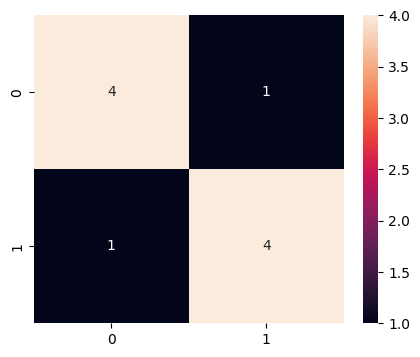

In [134]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# преобразуем матрицу в датафрейм Pandas
df_cm = pd.DataFrame(conf_mat[0])

# Задаем параметры вывода матрицы
plt.figure(figsize = (5, 4))

# Визализация датафрейма
sn.heatmap(df_cm, annot=True)

* Также матрицу ошибок можно построить с помощью готовой функции библиотеки sklearn

In [135]:
from sklearn.metrics import confusion_matrix

# Построение матрицы ошибок
cf_mat = confusion_matrix(y_true, y_pred)

cf_mat

array([[4, 1],
       [1, 4]])

__Вычисляем метрики__

* Для определения метрик необходимо зададим параметры TP, TN, FP, FN из матрицы ошибок

In [137]:
TP = cf_mat[0, 0]
FN = cf_mat[0, 1]
FP = cf_mat[1, 0]
TN = cf_mat[1, 1]

* Accuracy (доля правильных ответов)

In [138]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

np.float64(0.8)

* Precision (точность)

In [139]:
precision = TP / (TP + FP)
precision

np.float64(0.8)

* Recall (полнота)

In [140]:
recall = TP / (TP + FN)
recall

np.float64(0.8)

* F1-мера

In [141]:
f1 = 2 * (precision * recall) / (precision + recall)
f1

np.float64(0.8000000000000002)

### Задание 2: Метрики детекции объектов

Предположим, у вас есть модель детекции объектов, которая возвращает ограничивающие рамки (bounding boxes) и оценки уверенности для каждого обнаруженного объекта. Даны следующие истинные рамки и предсказанные рамки для одного изображения:

Истинные ограничивающие рамки (формат: [x_min, y_min, x_max, y_max])

gt_boxes = [

    [50, 50, 150, 150],

    [30, 30, 70, 70]

]

Предсказанные ограничивающие рамки и оценки уверенности

pred_boxes = [

    {'box': [48, 48, 152, 152], 'score': 0.9},
    
    {'box': [28, 28, 72, 72], 'score': 0.75},
    
    {'box': [100, 100, 200, 200], 'score': 0.6}

]

__Инструкции:__
1. Реализуйте функцию для расчета IoU (Intersection over Union) между двумя ограничивающими рамками.
2. При заданном пороге IoU 0.5 определите, какие предсказанные рамки являются истинно положительными, а какие — ложноположительными.
3. Рассчитайте precision и recall для этой детекции.

__Функция для расчета IoU__

In [142]:
# функция расчета пересечения областей
def get_intersection(gt_box, pred_box):
    gt_x_min = max(gt_box[0], pred_box[0])
    ls_x_max = min(gt_box[2], pred_box[2])
    gt_y_min = max(gt_box[1], pred_box[1])
    ls_y_max = min(gt_box[3], pred_box[3])

    if gt_x_min >= ls_x_max or gt_y_min >= ls_y_max: 
        return 0
    else:
        return (ls_x_max - gt_x_min) * (ls_y_max - gt_y_min)

# функция расчета объединения областей
def get_union(gt_box, pred_box):
    gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
    pred_box_area = (pred_box[2] - pred_box[0]) * (pred_box[3] - pred_box[1])
    union_area = gt_box_area + pred_box_area - get_intersection(gt_box, pred_box)
    return union_area 

# функция расчета IoU
def iou(gt_box, pred_box):
    return get_intersection(gt_box, pred_box) / get_union(gt_box, pred_box)    

__Определим, какие предсказанные рамки являются истинно положительными, а какие — ложно положительными__

* Задаем параметры и переменные

In [143]:
conf_score = 0.5
TP_status = 'истинно положительная'
FP_status = 'ложно попжительная'

gt_boxes = [
[50, 50, 150, 150],
[30, 30, 70, 70]
]

pred_boxes = [
{'box': [48, 48, 152, 152], 'score': 0.9},
{'box': [28, 28, 72, 72], 'score': 0.75},
{'box': [100, 100, 200, 200], 'score': 0.6}
]

res_out = []

* Функция, определяющая, каким является предсказание

In [144]:
def TP_or_FP(gt_boxes, pred_boxes):
    # проверяем предсказанные рамки относительно истинных
    # для этого сравниваем каждую предсказанную рамку с истинной
    for pred in pred_boxes:
        for gt in gt_boxes:
            # здесь необходимо проверить только те рамки,
            # у которых статус еще либо не определен, либо определен как ложно положительный
            if not 'status' in pred or pred['status'] == FP_status:
                # сравниваем полученное значение IoU с пороговым значением
                if iou(gt, pred['box']) < conf_score:
                    temp = FP_status
                else:
                    temp = TP_status
            # добавляем статус проверки к предсказанной рамке
            pred['status'] = temp
        # добавляем проверенную рамку к результату
        res_out.append(pred)
    return res_out

In [145]:
TP_or_FP(gt_boxes, pred_boxes)

[{'box': [48, 48, 152, 152], 'score': 0.9, 'status': 'истинно положительная'},
 {'box': [28, 28, 72, 72], 'score': 0.75, 'status': 'истинно положительная'},
 {'box': [100, 100, 200, 200], 'score': 0.6, 'status': 'ложно попжительная'}]

__Расчет precision и recall для этой детекции__

* В данной детекции отсутстуют реальные объекты, которые модель не смогла обнаружить, т.к. количество реальных рамок совпадает с количеством истинно положительных предсказаний. Поэтому при расчете полноты принимаем FN = 0

* Определяем значения TP и FP, как количество соответствующих значений в полученном списке res_out

In [146]:
FN = 0
TP = len([i for i in res_out if i['status']==TP_status])
FP = len([i for i in res_out if i['status']==FP_status])

In [147]:
TP

2

In [148]:
FP

1

* Определяем precision

In [149]:
precision = TP / (TP + FP)
precision

0.6666666666666666

* Определяем recall

In [150]:
recall = TP / (TP + FN)
recall

1.0